## `Análise de Cesta de Compras`
No reino das Insights impulsionadas por dados, a convergência das recomendações de produtos da Amazon e das sugestões de filmes da Netflix encontra sua materialização no domínio da Análise de Cesta de Compras. Este notebook embarca em uma exploração meticulosa da Análise de Cesta de Compras, orientada pelo `algoritmo Apriori`, uma série de métricas padronizadas e personalizadas, a intrincada tapeçaria de regras de associação, complementada pelos processos de agregação e poda. Esses aspectos culminam sinergicamente no auge da visualização. A jornada é dedicada a descobrir insights profundos de um conjunto de dados que representa um modesto estabelecimento de mercearia. Contudo, pode-se aplicar à qualquer experiencia de compra. Através da integração de elementos interativos, nós nos esforçamos para revelar sabedoria latente, enriquecendo assim nossa capacidade de fornecer recomendações de clientes mais nuances.

### `Revelando a Análise de Cesta de Compras no Contexto de Varejo de Mercearia`
A aplicação da análise de cesta de compras assume uma significância elevada quando aplicada à paisagem complexa de um conjunto de dados de mercearia. Ela funciona como uma bússola, guiando-nos pelo intrincado labirinto do comportamento do consumidor nos corredores da loja. Primordialmente, ela revela a sinfonia de combinações de produtos que os clientes frequentemente escolhem juntos, lançando luz sobre a convivência harmoniosa entre categorias como produtos frescos e laticínios. Subsequentemente, ela lança as bases para a construção de recomendações informadas com base nesses padrões emergentes. Por exemplo, ela pode sugerir a colocação conjunta de itens essenciais para assar ao lado das seções de açúcar e farinha, ao mesmo tempo em que defende a segregação de itens dietéticos dos produtos açucarados indulgentes.
- Discernindo a orquestração de pares de produtos favoritos.
    - Harmonia evidente: Produtos frescos e itens lácteos.
- Criando recomendações informadas por essas revelações.
    - Adjacência estratégica: Itens essenciais para assar próximos às seções de açúcar e farinha.
    - Diretriz de segregação: Separação distinta para produtos dietéticos e indulgentes.

### `Uma variedade de Aplicações Centradas em Mercearia`
A análise de cesta de compras revela sua versatilidade dentro do cenário de varejo de mercearia. Seu alcance se estende à orquestração de sugestões de produtos personalizadas, ao aprimoramento de estratégias de arranjo nas prateleiras e à otimização do gerenciamento de estoque para elevar a qualidade da experiência de compra.
- Orquestração de sugestões personalizadas para clientes de mercearia.
- Aprimoramento das estratégias de arranjo nas prateleiras para acessibilidade otimizada.
- Ajuste fino do gerenciamento de estoque para melhorar a experiência de compra.

### `Aproveitando a Análise de Cesta de Compras`
A análise de cesta de compras opera dentro do framework das `"regras de associação"`, constituindo uma pedra angular dessa metodologia. Essas regras encapsulam a intrincada rede de associações de itens, frequentemente derivadas de aquisições conjuntas frequentes. Uma regra de associação assume o formato de um relacionamento `"se-então"`, conectando dois conjuntos distintos de itens. Esses subconjuntos são categorizados como o `"antecedente"` e o `"consequente"`. `Em nosso contexto, o antecedente diz respeito ao conjunto inicial de itens, enquanto o consequente representa o conjunto subsequente`.

Por exemplo, considere o cenário em que a compra de livros de ficção demonstra uma associação discernível com a aquisição de biografias, como evidenciado pelas transações apresentadas no slide adjacente. Essa conexão é sucintamente encapsulada na seguinte regra de associação: `"se ficção, então biografia"`.

- Notebook Autor: [Enio Rubens][1]
- Projeto: Análise de Cesta de Compras
 
[1]: https://github.com/eniorubens/enioRubens_dataScienceProjects

In [ ]:
# Autor : Enio Rubens
#
# Cientista de Dados
__author__ = 'Enio Rubens'

### `Iniciação de Parâmetros`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# Plot settings
sns.set_theme(style="ticks")
mpl.rcParams['figure.dpi'] = 96
mpl.rcParams['figure.figsize'] = (13.33,6.5)

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 20

# Axes labels
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelweight'] = 'bold'

# Grid and thicks
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.grid.axis'] = 'y'
#mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['ytick.left'] = False

# Legend
mpl.rcParams['legend.facecolor'] = 'w'
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['legend.edgecolor'] = 'gray'
mpl.rcParams['legend.borderpad'] = 0.6

# Other
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
#mpl.rcParams['scatter.edgecolors'] = None

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 1000

### `Inicialização do Dataset`
Utilizamos o dataset do Kaggle neste [link](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset).

Nossa jornada de descoberta começa com a inicialização do conjunto de dados em um DataFrame do pandas. Uma sinfonia de insights nos aguarda enquanto navegamos pelos acordes deste empório culinário. Este conjunto de dados possui um trio de colunas, cada uma possuindo sua essência distinta, contribuindo harmoniosamente para a narrativa.
- **Member_number:** Significando o identificador único dos membros, fomentando uma sensação de individualidade.
- **Date:** Um marcador cronológico, adornado com contexto temporal, invocando uma sensação de sequência.
- **itemDescription:** Um repositório de descrições textuais, cada uma encapsulando a essência de tesouros consumíveis.

Executamos a seguir, o ato pivotal da iniciação do conjunto de dados, iniciando a jornada que se desdobrará nas células seguintes.

In [3]:
import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        display(os.path.join(dirname, filename))

'./dataset/Groceries_dataset.csv'

In [4]:
# Load transactions from pandas.
def read_data()->pd.DataFrame:
    return pd.read_csv("./dataset/Groceries_dataset.csv")
    
transaction = read_data()    
transaction.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


>À medida que trilhamos o caminho à frente, as páginas de nossa exploração serão agraciadas pelas Insights extraídas deste repositório gastronômico, guiando-nos para entendimentos enriquecidos.

### `Quantificação de Agrupamentos de Itens`
Em nossa busca pela iluminação, acabamos de imprimir os primeiros itens na lista de transações para ver como ele está formatado. Começamos lançando nosso olhar sobre a entrada inicial na procissão de transações, espreitando o próprio coração de sua estrutura. Como antecipado, a transação revela sua composição - uma sinfonia de gêneros, elegantemente entrelaçados dentro de uma lista.

Assim, armados com esse conhecimento, aventuramo-nos a invocar o método `count`, um instrumento poderoso pronto para desvendar a cardinalidade de transações que abrigam o repertório idêntico de itens fornecidos para sua análise. Como demonstração de seu poder, selecionamos um par de itens e o apresentamos ao domínio do método.

Neste balé cerebral, nossa compreensão se aprofunda à medida que percorremos o intrincado terreno dos agrupamentos de itens, a base sobre a qual nossas análises serão tecidas.

In [5]:
# Take a look at dataset
transactions = transaction.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions.head(6)

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yogurt]"
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
5,1001,02-05-2015,"[frankfurter, curd]"


In [6]:
# Retrieve data from the item description column and convert it to a list
transactions = transactions['itemDescription'].tolist()
transactions[:6]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd']]

[['salsicha', 'leite integral', 'pão semiacabado', 'iogurte'],
  ['leite integral', 'pastelaria', 'lanche salgado'],
  ['cerveja em lata', 'misc. bebidas'],
  ['salsicha', 'artigos de higiene'],
  ['refrigerante', 'legumes em conserva'],
  ['Hot-dog', 'coalhada']]

In [7]:
# Count the number of transactions with sausage and whole milk
sausage = transactions.count(['sausage', 'whole milk'])

# Count the number of transactions with whole milk and pastry
whole_milk = transactions.count(['whole milk', 'pastry'])

# Count the number of transactions with sausage and hygiene articles
hygiene_articles = transactions.count(['sausage','hygiene articles'])

# Print the counts for each transaction.
print(f'''
Sausage with whole milk         : {sausage}
Whole milk with pastry          : {whole_milk}
Sausage with hygiene articles   : {hygiene_articles}'''
)


Sausage with whole milk         : 37
Whole milk with pastry          : 14
Sausage with hygiene articles   : 2


>- **`Insights`**: à medida que os resultados se desenrolam diante de nós, um mundo de recomendações emerge como uma tela esperando por seus traços de pincel. Aqui está uma ideia - que tal considerar colocar salsichas bem ao lado do leite integral? É como uma sinfonia de sabores prestes a acontecer! Ou que tal uma sugestão amigável de venda cruzada? Nas células seguintes, exploraremos a arte de decifrar regras de associação valiosas, mesmo diante de desafios.

#### `Navegando pelo Universo das Regras de Associação`
Imagine isto: estamos entrando no coração da análise de cestas de mercado, onde a magia acontece. Tudo se resume a vasculhar uma vasta variedade de possíveis regras de associação e selecionar aquelas que realmente importam para um propósito comercial específico.

#### `Desvendando Regras de Associação`
Lembre-se, cada regra de associação tem dois protagonistas principais: o antecedente e o consequente. Imagine isso como uma parceria de dança. Uma regra simples com um de cada pode ser algo como "se saúde, então culinária." Mas as coisas podem ficar mais intrincadas. Existem regras com múltiplos antecedentes, como "se humor e viagem, então idiomas." E também existem aquelas com múltiplos consequentes, como "se biografia, então história e idiomas."

- `Regras de Associação`
    - Essas pérolas contêm um antecedente e um consequente
        - {salsicha} → {leite integral}
- `A Complexidade das Regras com Múltiplos Antecedentes`
    - Às vezes, é uma dupla dinâmica: {salsicha, leite integral} → {pão semi-acabado}
- `Aventurando-se em um Território com Múltiplos Consequentes`
    - Outras vezes, trata-se de efeitos em cascata: {salsicha} → {leite integral, pão semi-acabado}

Com essa dança lúdica de regras, estamos prontos para cavar mais fundo e desvendar os segredos que essas associações têm para nós!

#### `Navegando pelo Labirinto da Seleção de Regras`
Aqui está a dica: descobrir essas pepitas de ouro das regras pode ser um desafio. Na maioria dos casos, o mar de regras potenciais se estende por toda parte, mas apenas algumas são realmente valiosas para nossos propósitos. É aqui que nossa arte entra em ação - precisamos de uma maneira de vasculhar o palheiro e encontrar essas agulhas.

- `O Desafio de Descobrir Valor`
    - As possibilidades de regras são abundantes.
    - No entanto, a maioria das regras são apenas ruído.
    - Nossa missão: discernir os diamantes brutos.

#### `A Busca pela Simplicidade`
Já considerou simplificar a busca? Que tal nos concentrarmos no básico - regras simples, apenas um antecedente e um consequente. Parece um plano, certo? Mas não se deixe enganar. Mesmo nesse domínio da simplicidade, os desafios prosperam, especialmente quando estamos trabalhando com um conjunto de dados pequeno.

- `Destilando Complexidade para Simplicidade`
    - `Mantendo o básico`: Um antecedente, um consequente.
    - Decepção de simplicidade, surpreendentemente intrincada, mesmo para conjuntos de dados modestos.

#### `Explorando as Métricas da Magia`
A análise de cestas de mercado gira em torno do reino mágico das regras. Conforme mergulhamos mais fundo neste labirinto, estamos em uma busca para descobrir regras que realmente importam. Mas como identificamos as joias? Entre em cena: a métrica crucial conhecida como `support` e um processo conhecido como `poda`.

À medida que as cortinas se levantam para o próximo ato, prepare-se para uma jornada encantadora através de métricas e maestria!

#### `Métricas Reveladas: Adentrando o Desempenho`
Uma métrica é como um indicador, nos dizendo o quão bem uma regra se sai. Imagine isso: para uma regra como "se cerveja engarrafada, então água engarrafada", uma métrica pode apresentar orgulhosamente o valor 0.81. Agora, para a regra "se pão integral, então manteiga", a mesma métrica poderia sussurrar 0.23. Essas métricas nos guiam, nos ajudando a vasculhar o jardim de regras.
- `Aprofundando nas Métricas`
    - Uma espiada no desempenho da regra.
    - As métricas revelam a magia por trás das regras.
    - Exemplo: {cerveja engarrafada} → {água engarrafada} - `Métrica: 0.81`
    - Exemplo: {pão integral} → {manteiga} - `Métrica: 0.23`

#### `Poda: A Arte da Seletividade`
A arte da poda - nossa ferramenta para eliminar as regras menos cativantes. Imagine isso: não queremos uma festa bagunçada, então convidamos apenas os convidados excepcionais. Com a ajuda de nossa métrica confiável, só permitimos que as regras que atendam a um certo limite entrem. `Se estiver acima, está dentro; se estiver abaixo, está fora. Voilà!` "Se cerveja engarrafada, então água engarrafada" ganha um lugar, enquanto "se pão integral, então manteiga" espera do lado de fora. 
- `Podando o Jardim de Regras`
    - Orientados por métricas para eliminar o medíocre.
    - Exemplo: {cerveja engarrafada} → {água engarrafada} - `Dentro`!
    - Exemplo: {pão integral} → {manteiga} - `Fora`!

#### `A Magia do Support (Suporte)`

Vamos falar sobre o coração da análise de cestas de mercado - **support**. Tudo se resume a encontrar aqueles itens muito amados que aparecem em inúmeras transações. A matemática simples faz sua mágica:

$$
\begin{align*}
    &\text{Support(A)} = \frac{\text{Transações(A)}}{\text{Total de Transações}} \\[2em]
    &\text{Support(Ovos)} = \frac{3}{6} = \frac{1}{2} = 0.5 \\[2em]
    &\text{Support(Bacon)} = \frac{4}{6} = \frac{2}{3} = 0.667 \\[2em]
    &\text{Support(Maçã)} = \frac{2}{6} = \frac{1}{3} = 0.333 \\[2em]
    &\text{Support(Ovos e Bacon)} = \frac{3}{6} = 0.5
\end{align*}
$$

A dança do support nos convida a revelar companheiros frequentes em transações. Portanto, vamos nos mover ao ritmo do support e revelar esses itens queridos!

In [8]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Fa

#### `Calculando o Support: Revelando Insights`
Na etapa anterior, transformamos nosso conjunto de dados em uma maravilha codificada em one-hot - o DataFrame conhecido como `onehot`. Neste momento, armados com nossa confiável métrica de support, estamos prontos para dar uma mãozinha ao proprietário da loja.

#### `Favoritos Frequentes: Revelando as Estrelas`
- `Passo um`: vamos destacar os itens queridos - os frequentadores assíduos em nossas transações. Nossa busca começa com o cálculo do support, iluminando o mundo dos itens aos quais os clientes parecem se inclinar.
- `Passo dois`: um teste de conexão. A regra em questão - {geleia} → {pão} - está diante de nós. Armados com a métrica de support, questionamos se essa regra desfruta do brilho da popularidade, ostentando um valor de support superior a 0.05.

Com essas ferramentas em mãos, avançamos para oferecer Insights que enriquecerão as estratégias e escolhas da loja.

In [9]:
# Compute the support
support = onehot.mean().sort_values(ascending=False)

# Print the support
support.head(10)

whole milk          0.157923
other vegetables    0.122101
rolls/buns          0.110005
soda                0.097106
yogurt              0.085879
root vegetables     0.069572
tropical fruit      0.067767
bottled water       0.060683
sausage             0.060349
citrus fruit        0.053131
dtype: float64

In [10]:
# Add a whole milk + other vegetables column to the DataFrame onehot
support_1 = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Add a whole milk + rolls/buns column to the DataFrame onehot
support_2 = np.logical_and(onehot['whole milk'], onehot['rolls/buns']).mean()

# Add a whole milk + yogurt column to the DataFrame onehot
support_3 = np.logical_and(onehot['whole milk'], onehot['yogurt']).mean()

# Print support values
print(f'''
whole milk and other vegetables : {support_1:.4f}
whole milk and rolls/buns       : {support_2:.4f}
whole milk and yogurt           : {support_3:.4f}
''')


whole milk and other vegetables : 0.0148
whole milk and rolls/buns       : 0.0140
whole milk and yogurt           : 0.0112



>- **`Insights`**: O mundo dos números revela seus segredos, e nossa métrica de support traz clareza ao palco. Em meio à dança dos dados, duas estrelas brilham mais intensamente: leite integral e outros vegetais. Essas gemas surgem como principais concorrentes para a promoção cruzada, apresentando uma oportunidade tentadora para o proprietário da loja explorar. A cortina se abre para possibilidades enquanto deciframos essas Insights!

#### `Confidence: Iluminando Relações`
A *confidence* (confiança) é o farol que nos guia pelo labirinto dos padrões de compra. É tudo sobre responder à pergunta: "Quão certo estamos de que um item será comprado se outro tiver sido retirado da prateleira?"

Agora, vamos decifrar o código dessa métrica encantadora:

$$
\text{Confidence(A → B)} = \frac{\text{Probabilidade(A e B)}}{\text{Support(A)}}
$$

Em essência, a *confidence* é semelhante à probabilidade condicional no mundo das estatísticas:

$$
P(B|A) = \frac{\text{P(A e B)}}{P(A)}
$$

Mas aqui está a reviravolta - a notação pode variar. (A → B) e (B|A) podem parecer diferentes, mas são dois lados da mesma moeda.

#### `Analisando os Números: Dança de Ovos e Bacon`
Hora de uma dança de números! Vamos ilustrar isso com ovos e bacon, parceiros na valsa culinária americana. A confiança os une:
- `Confidence(Ovos → Bacon)`
    - Fator de segurança: 1
    - Interpretação: Se ovos forem comprados, bacon seguirá com certeza.
- `Confidence(Bacon → Ovos)`
    - Fator de segurança: 0.75
    - Interpretação: Se bacon for escolhido, ovos acompanham com uma probabilidade de 75%.

À medida que brincamos com números, desbloqueamos a sinfonia da confiança que está no coração de nossa análise de cestas de mercado!

#### `Aprimorando Insights: Revelando a Direção da Confidence`
Um momento de contemplação nos leva à encruzilhada da direção. No mundo das relações, o leite integral deve chamar outros vegetais, ou leite integral seria melhor para pães/rolos? Essa pergunta paira no ar como uma dança esperando sua coreografia.

#### `A Métrica de Confidence Assume a Dianteira`
Ao desvendar esse dilema intrincado, recorremos à métrica de confiança - o farol que ilumina o caminho. Ao contrário da posição imparcial do support, a confiança toma partido. É tudo sobre quem lidera quem nessa dança culinária.

#### `O Duelo das Direções`
E assim, embarcamos em um duelo de direções, calculando a métrica de confiança para ambos os concorrentes:
- `Confidence(leite integral → outros vegetais)`
    - Guia direcional: leite integral liderando o caminho.
- `Confidence(outros vegetais → leite integral)`
    - Guia direcional: outros vegetais no comando.

Conforme os números revelam sua história, nos encontramos prontos para oferecer uma direção estratégica com base nas Insights obtidas. Vamos ver qual item assume o centro do palco como nossa recomendação.

In [11]:
# Compute support for whole milk and other vegetables (both)
supportB = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportWM = onehot['whole milk'].mean()

# Compute support for other vegetables
supportOV = onehot['other vegetables'].mean()

# Compute confidence for both rules
confidenceWM = supportB / supportWM
confidenceOV = supportB / supportOV

# Print results
print(f'''
Confidence for whole milk       : {confidenceWM:.2f} 
Confidence for other vegetables : {confidenceOV:.2f}''')


Confidence for whole milk       : 0.09 
Confidence for other vegetables : 0.12


> - **`Insights`**: Guia direcional: outros vegetais liderando o caminho.

#### `Lift: Revelando a Força da Associação`
Estamos prestes a desvendar a força da associação com a poderosa ferramenta conhecida como `lift`! Quando a frequência de compra de diferentes itens entra em jogo, como realmente discernimos a potência da ligação entre eles? Bem, é aí que o `lift` vem em nosso socorro.

#### `A Anatomia do Lift`
Aqui está a dica: o `lift nos oferece uma lente objetiva para avaliar a força da associação`. Vamos mergulhar na fórmula, primeiro em sua forma bruta:

$$
\text{Lift(A → B)} = \frac{\text{Probabilidade(A e B)}}{(Support(A) \times Support(B))}
$$

Mas espere um pouco, as coisas se simplificam lindamente! Com um toque de elegância, transformamos isso em:

$$
\text{Lift(A → B)} = \frac{\text{Confidence(A → B)}}{\text{Support(B)}}
$$

#### `Triturando os Números : O Duelo de Ovos e Bacon`
Hora de testar o lift (elevação), mostrando sua magia com ovos e bacon:
- `Lift(Ovos → Bacon)`
    - O fator mágico: 1.5
- `Lift(Bacon → Ovos)`
    - O fator mágico: 1.5

Nesse duelo encantador, o palco está montado para ovos e bacon brilharem com um valor de lift de 1.5 cada.

#### `Decifrando o Significado do Lift`
Então, qual é o segredo por trás do lift? `Um valor de lift maior que 1 nos diz que os itens são mais propensos a serem comprados juntos, enquanto um valor menor que 1 sinaliza uma tendência para compras separadas. Um lift de 1? É o marco de nenhuma associação significativa entre os itens`.

#### `Uma Busca por Confirmação: Em Busca de Outra Métrica`
Sua sugestão é anotada, e embarcamos em uma busca por confirmação. Desta vez, o lift assume o destaque:

O lift oferece outra perspectiva para visualizar o relacionamento. Conforme mergulhamos mais fundo nas métricas que ele ilumina essas associações.

In [12]:
# Compute support for beef and butter milk
supportPT = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportWM = onehot['whole milk'].mean()

# Compute support for other vegetables
supportOV = onehot['other vegetables'].mean()

# Compute lift
lift = supportPT / (supportWM * supportOV)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.77


> De fato, a história se desenrola com um twist revelador! Conforme a poeira assenta e os números revelam sua dança, descobrimos que o lift não se destaca, abaixo do limiar de 1.0. Um sinal de pouca promessa, um farol de confiança de que a regra de associação que defendemos surgiu apenas por acaso.

#### `Conviction: Desvendando a Complexidade da Associação`
Estamos prestes a mergulhar em uma dimensão mais profunda da associação com o intrigante conceito conhecido como `conviction`! Essa métrica explora as complexidades da probabilidade, comparando as chances de um item aparecer sem seu parceiro se eles fossem independentes versus sua ocorrência real.

#### `A Equação da Conviction (Convicção)`
Vamos iluminar o caminho com a fórmula geral:

$$
\text{Conviction(A → B)} = \frac{(1 - \text{Support(B)})}{(1 - \text{Confidence(A → B)})}
$$

Em nossa história em desenvolvimento, trazemos essa equação à vida:
- `Conviction(Ovos → Bacon)`
    - A história se desenrola: Infinito
- `Conviction(Bacon → Ovos)`
    - A narrativa se aprofunda: 2

#### `Interpretando a Sabedoria da Conviction`
Um valor de conviction igual a 1 revela a ausência de associação entre os itens. Mas quando a conviction ultrapassa 1, o relacionamento fala mais alto - quanto maior o valor, mais forte é o vínculo.

Enquanto ponderamos essas métricas intrincadas, desvendamos as camadas de associação que se escondem sob a superfície das transações.

In [13]:
# Compute support for whole milk AND other vegetables
supportPH = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportP = onehot['whole milk'].mean()

# Compute support for NOT other vegetables
supportnH = 1.0 - onehot['other vegetables'].mean()

# Compute support for whole milk and NOT other vegetables
supportPnH = supportP - supportPH

# Compute and print conviction for whole milk -> other vegetables
conviction = supportP * supportnH / supportPnH
print("Conviction: %.2f" % conviction)

Conviction: 0.97


> Deixemos a sabedoria da *conviction* nos guiar pelo labirinto da associação! Conforme os números se encaixam, o valor da *conviction* permanece firme em 1, lançando uma sombra reveladora sobre a regra "se leite integral, então outros vegetais". Os ecos da *conviction* indicam que este caminho em particular carece do support e da ressonância que buscamos. A dança das métricas lança luz sobre as complexidades dos relacionamentos, revelando a tapeçaria da história dos dados.

#### `Métrica de Zhang: Revelando Sutilezas`
A ferramenta `métrica de Zhang` possui o poder de capturar a essência da associação e dissociação entre itens. Vamos desvendar essa jóia lentamente, passo a passo.

#### `A História do Numerador`
Primeiramente, adentramos no numerador - uma história de duas confianças. Medimos a força da associação com "se A então B". Subtraindo disso a confiança de "se NÃO A então B", ponderamos a dança entre presença e ausência. $\frac{numerador}{denominador}$

#### `A Dança do Denominador`
Em seguida, o denominador - o palco da normalização. Damos uma olhada no máximo das duas confianças, garantindo um equilíbrio que evita valores abaixo de -1 ou acima de 1. Este denominador atua como a medida definitiva de comparação.

#### `A Essência da Métrica de Zhang`
Em essência, a métrica de Zhang encapsula o fluxo da associação e dissociação. Seus valores variam de positivo para associações fortes a negativo para dissociação pronunciada. Essa métrica pinta uma imagem contínua dos relacionamentos intrincados que buscamos desvendar.

#### `Uma Abordagem Simplificada: Support Revelado`
Conforme construímos a métrica de Zhang, uma forma mais simples emerge - centrada no support de nossos itens. O numerador toma forma como o support de A e B, menos o produto do support de A e do support de B. O denominador se desdobra como o máximo do support de A e B, multiplicado pela diferença entre 1 e o support de A. Esta é a dança da métrica de Zhang em sua forma mais digestível.

#### `Números em Ação: A Revelação`
Conforme calculamos os números, a métrica de Zhang desvenda sua história encantadora. A associação se destaca como um farol positivo, enquanto a dissociação lança uma sombra negativa. O palco está montado para esta métrica iluminar os relacionamentos ocultos que se encontram dentro do mundo das transações.

Dê uma olhada nessas revelações enquanto abraçamos a profundidade e complexidade da análise.

In [14]:
# Compute the support of whole milk and  other vegetables
supportT = onehot['whole milk'].mean()
supportP = onehot['other vegetables'].mean()

# Compute the support of both onehot
supportTP = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator

print("Zhang : %.4f" % zhang)

Zhang : -0.2625


>Nosso exemplo tem uma projeção de dissociação, é uma sombra negativa.

In [15]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

transactions_flatten = flatten_extend(transactions)
print(f'Quantas transações : {len(transactions_flatten)}')
print(f'Quantos itens : {len(set(transactions_flatten))}')
display(transactions_flatten[:10])

Quantas transações : 38765
Quantos itens : 167


['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'whole milk',
 'pastry',
 'salty snack',
 'canned beer',
 'misc. beverages',
 'sausage']

### `Embarcando na Aventura Apriori`
Na nossa busca por insights, este algoritmo assume o centro do palco, detendo o poder de domar a complexidade de grandes conjuntos de dados e de explorar o labirinto de possibilidades.

#### `Contando o Incontável: Odisséia dos Conjuntos de Itens`
Ao analisarmos o market basket, nos deparamos com o enigma dos itens - uma multidão que gera inúmeras regras de associação. Nossa arma de escolha, o algoritmo Apriori, concentra-se nos conjuntos de itens, visando podar o jardim das possibilidades.

Contemplemos o reino das combinações, onde números dançam em padrões de possibilidade. O número de conjuntos de itens que podemos criar selecionando `k` itens de um conjunto de `n` desafia a compreensão. A fórmula `n choose k` vem em nosso socorro, revelando a verdadeira magnitude da jornada:

$$
\binom{n}{k} = \frac{n!}{(n-k)!k!}
$$

#### `Números que Surpreendem: A Grande Contagem`
Com nosso conjunto de dados de 38765 itens, a sinfonia das possibilidades se desenrola:

À medida que trilhamos este caminho de complexidade e maravilha, o algoritmo Apriori assume a liderança, guiando-nos através da dança de insights que se encontram dentro do abraço dos dados!

In [16]:
import scipy.special

# the dance
duo  = int(scipy.special.binom(167, 2))
trio = int(scipy.special.binom(167, 3))
quartet = int(scipy.special.binom(167, 4))

print(
f'''
Com nosso dataset de 38765 itens, a sinfonia de possibilidades se desenrola:
- 1 itemset: O conjunto nulo, desprovido de itens.
- 167 itemsets: Um item singular adorna cada conjunto.
- Aproximadamente {duo} itemsets: Um dueto de itens sobe ao palco.
- Quase {trio} itemsets: Um trio de itens encanta o cenário.
- Quase {quartet} itemsets: O quarteto de itens pinta um quadro hipnotizante.
''')


Com nosso dataset de 38765 itens, a sinfonia de possibilidades se desenrola:
- 1 itemset: O conjunto nulo, desprovido de itens.
- 167 itemsets: Um item singular adorna cada conjunto.
- Aproximadamente 13861 itemsets: Um dueto de itens sobe ao palco.
- Quase 762355 itemsets: Um trio de itens encanta o cenário.
- Quase 31256555 itemsets: O quarteto de itens pinta um quadro hipnotizante.



### `Caminho de Podas do Apriori`
No labirinto de inúmeros conjuntos de itens, o `algoritmo Apriori` emerge como nossa luz guia, liderando o caminho através do intricado caminho de poda e retenção. Enquanto embarcamos nesta jornada, vamos desvendar os mecanismos que dão vida à habilidade deste algoritmo.

#### `Enfrentando a Impossibilidade`
À medida que o número de conjuntos de itens puros fica imenso, o desafio se torna claro: avaliá-los todos é uma façanha impossível, além do alcance da enumeração em si. A pergunta surge: como podemos eliminar um conjunto de itens sem sequer nos aventurarmos em sua avaliação?

#### `Entra a Regra de Poda`
A regra bruta de definir um valor máximo para `k` é uma possibilidade, mas o sacrifício de regras interessantes está iminente. No entanto, o algoritmo Apriori oferece uma solução mais refinada. Ele opera sobre o alicerce do `princípio Apriori`, chave para discernir o destino dos conjuntos de itens.

#### `A Sabedoria do Princípio Apriori`
Contemplemos a sabedoria do princípio Apriori: subconjuntos de conjuntos frequentes também devem ser frequentes. Esta regra fundamental guia nossa busca por associação. À medida que identificamos conjuntos frequentes com base em um nível mínimo de support, invocamos o princípio Apriori para reter e podar conjuntos.

#### `Um Efeito Cascata`
Imagine um cenário em que as velas caem abaixo do limiar de frequência. Ao invocar o princípio Apriori, esta decisão se estende aos seus companheiros. Placas, caixas e além - todos são marcados como não frequentes. Um único cálculo de support para velas possui o poder de eliminar um quarto de todas as combinações concebíveis sem sequer contá-las.

Conforme seguimos o caminho do algoritmo Apriori, testemunhamos a maravilha da poda, onde cada decisão se propaga através da intrincada teia de possibilidades, nos orientando para insights escondidos dentro da vasta expanse de dados!
- Princípio Apriori.
    - Subconjuntos de conjuntos frequentes também são frequentes.
    - Retenha conjuntos conhecidos como frequentes.
    - Pode conjuntos não conhecidos como frequentes.
- Velas = Infrequentes
    - {Velas, Placas} = Infrequentes
- {Velas, Placas} = Infrequentes
    - {Velas, Placas, Caixas} = Infrequentes
- {Velas, Placas, Caixas} = Infrequentes
    - {Velas, Placas, Caixas, Sacolas} = Infrequentes

In [17]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.006, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
print(frequent_itemsets.head())

    support         itemsets
0  0.021386       (UHT-milk)
1  0.008087  (baking powder)
2  0.033950           (beef)
3  0.021787        (berries)
4  0.016574      (beverages)


### `Navegando no Limiar de Support`
Enquanto contemplamos a paisagem de nossas descobertas, surge uma questão intrigante - um coro de conjuntos de itens, cada um consistindo de um único item. Uma pergunta emerge: poderia existir uma regra menos rigorosa, permitindo-nos lançar uma rede mais ampla e abraçar conjuntos de itens com múltiplos companheiros?

Intrigados pela ideia, ponderamos as raízes dessa peculiaridade. O parâmetro `max_len`, portador de regras, permanece firme em três. No entanto, os conjuntos de itens ainda nos escapam, envoltos em solidão. Poderia ser que o limiar de support detenha a chave para esse enigma?

#### `A Jornada da Exploração`
Com o espírito de curiosidade nos guiando, partimos para explorar os mistérios do support. E se ajustarmos esse parâmetro, trazendo uma era mais flexível? O mar de conjuntos de itens se expandirá, convidando aqueles com mais de um membro para nos acompanhar?

#### `Testando as Águas: Uma História de Dois Valores`
Embarcamos em uma jornada de experimentação, testando as águas com dois valores distintos de support. Os números contarão a história: quantos conjuntos de itens adicionais surgirão das profundezas, à medida que afrouxamos o critério?

À medida que o cenário se desenha neste capítulo de exploração, nos encontramos à beira da revelação, prontos para descobrir o potencial oculto de conjuntos de itens com múltiplos companheiros. A jornada continua, e o caminho da descoberta nos chama adiante!

In [18]:
# Compute frequent itemsets using a support of 0.003 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.003, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.001 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.001, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

216 750


In [19]:
frequent_itemsets_2.head(7)

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


### `Navegando na Associação com o Apriori`
Relembrando nossa jornada com o Apriori, nos encontramos em uma encruzilhada onde o algoritmo habilmente podou o reino de conjuntos de itens, mantendo apenas aqueles que ultrapassam o limite de frequência. No entanto, nos encontramos ansiando por mais - além do reino da frequência está a dança intricada das regras de associação.

#### `O Dilema da Associação do Apriori`
À medida que o sol se põe no reino dos conjuntos de itens, surge uma pergunta: como podemos ir das frequências para as regras de associação? O Apriori, embora mestre em sua habilidade de poda, nos deixa parados na entrada, contemplando a vasta paisagem da associação.

#### `A Trilha das Regras de Associação`
Regras de associação, ao contrário dos conjuntos de itens, são numerosas. Um conjunto de itens, como "sacos e caixas", pode gerar regras de associação como "se sacos, então caixas" e "se caixas, então sacos". O desafio aumenta à medida que os conjuntos de itens se expandem em tamanho.

#### `Abraçando o mlxtend: Uma Solução Pragmática`
Enquanto ponderamos as complexidades da computação de regras de associação, um salvador surge - `mlxtend`, um farol de simplicidade. Com sua ajuda, podemos navegar pelo labirinto de regras de associação com facilidade.

#### `A Dança da Computação`
Vamos considerar um exemplo para desmistificar o processo. Começamos importando as joias do Apriori e regras de associação do `mlxtend`. Com um conjunto de dados codificado one-hot em mãos, invocamos o algoritmo Apriori, dando origem a um DataFrame de conjuntos de itens frequentes. O palco está pronto para a grande performance da computação de regras de associação.

#### `Domando os Números: Poda e Precisão`
À medida que trilhamos esse caminho, surge uma pergunta: como controlamos o fluxo de regras de associação? Entra em cena a oferta do `mlxtend` - um método conhecido como `association_rules()`. Armado com itens frequentes, uma métrica e um limite, este método atua como um guardião, permitindo-nos podar e moldar o fluxo de regras de associação.

Com expectativa, definimos o limite de support como 0.0015, uma escolha que abre as comportas, produzindo uma enxurrada de regras de associação, intocadas pela poda. A jornada continua, à medida que abraçamos a sinergia do Apriori e das regras de associação, revelando insights escondidos nas profundezas de nossos dados!

In [20]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                         	min_threshold = 0.0015)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = 'support', 
                        	min_threshold = 0.0015)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

210 648


### `Refinando a Associação: Em Busca de uma Única Regra`
Conforme nossa exploração das regras de associação se desenrola, mais uma vez nos encontramos na encruzilhada da refinamento. Munidos de duas regras a partir de um limite de support mais baixo, sentimos o chamado para destilar ainda mais nossas descobertas e revelar uma única e impactante visão.

#### `Lift: Uma Luz Orientadora`
Na nossa busca por simplicidade e clareza, voltamos-nos para o farol do lift - uma interpretação que transcende a complexidade. Como nos lembramos, valores de lift maiores do que 1 têm um significado profundo: os itens são mais propensos a ocorrer juntos do que esperaríamos se eles fossem independentemente espalhados pelas transações.

#### `Reduzindo Dois em Um`
Empoderados por essa sabedoria, embarcamos no caminho do refinamento. Munidos do pandas como nosso aliado confiável e dos dados de transações codificados one-hot à nossa disposição, recorremos às ferramentas do `mlxtend`, especificamente o `apriori`. Nossa missão: utilizar a magia do lift para reduzir nossas duas regras em uma única fonte de insight.

#### `O Caminho a Seguir`
Com o lift como nossa bússola, navegamos pela paisagem das regras de associação, peneirando possibilidades para descobrir a regra que encapsula a essência de nossos dados. À medida que percorremos esse caminho, somos impulsionados pela busca do conhecimento, a busca por uma única verdade que iluminará as conexões ocultas dentro de nossos dados.

A jornada continua, e o destino - uma regra de associação refinada e impactante - está ao nosso alcance. Com o lift como nosso guia, partimos para desvendar a peça final do quebra-cabeça, prontos para apresentar nossas descobertas à audiência ansiosa!

In [21]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.0)

# Print association rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
3,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
5,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369
6,(curd),(beef),0.033683,0.033950,0.001270,0.037698,1.110396,1.262443e-04,1.003895,0.102886
7,(beef),(curd),0.033950,0.033683,0.001270,0.037402,1.110396,1.262443e-04,1.003863,0.102915
8,(frozen vegetables),(beef),0.028002,0.033950,0.001270,0.045346,1.335656,3.191056e-04,1.011937,0.258544
9,(beef),(frozen vegetables),0.033950,0.028002,0.001270,0.037402,1.335656,3.191056e-04,1.009764,0.260136


### `Aprimorando com Confidence: A Busca Continua`
Enquanto navegamos no labirinto das regras de associação, nos deparamos mais uma vez com o desafio do refinamento. Munidos de várias regras valiosas, estamos diante da encruzilhada em busca da joia elusiva que encapsulará a essência de nossos dados.

#### `Os Ecos da Similaridade`
Curiosamente, enquanto analisamos nossas descobertas, notamos um padrão - uma sinfonia de regras que compartilham um conjunto comum de itens, como ecos em uma vasta câmara. Cada regra apenas troca os papéis de antecedentes e consequentes, pintando um quadro de dualidade. Nossa busca pela singularidade permanece insatisfeita.

#### `Revelando a Métrica Certa`
Inabalados pela complexidade de nossa tarefa, contemplamos as métricas à nossa disposição. Lift e support, embora companheiros fiéis, fornecem uniformidade que não distingue entre a sinfonia de regras diante de nós. Procuramos uma métrica que conceda singularidade a cada regra, permitindo-nos destacar a regra que ressoa mais profundamente.

#### `O Quociente de Confidence`
E assim, voltamos nossa atenção para a confiança - uma métrica que diferencia as regras geradas a partir do mesmo conjunto de itens. A confiança, a medida de quantas vezes um consequente é comprado quando o antecedente é adquirido, torna-se nossa estrela guia. Com ela, esperamos iluminar o caminho em direção a uma regra de associação singular e impactante.

#### `A Revelação Aguarda`
Com a confiança como nossa Estrela do Norte, embarcamos na etapa final de nossa jornada. A cortina se abre em uma cena de exploração e descoberta, onde buscamos a regra que se destaca como um farol de insight, capturando a dança intricada da associação dentro de nossos dados.

Conforme continuamos nossa expedição, guiados pelos sussurros da confiança, a antecipação cresce - a revelação da regra de associação definitiva está no horizonte, pronta para lançar luz sobre a tapeçaria oculta de conexões dentro de nosso conjunto de dados. A jornada se aproxima de seu clímax, e o destino nos chama. 

In [22]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.0015, 
                            max_len=2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                         	min_threshold = 0.1)

# Print association rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
1,(UHT-milk),(whole milk),0.021386,0.157923,0.002540,0.118750,0.751949,-0.000838,0.955549,-0.252105
2,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,-0.000683,0.976656,-0.131343
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,0.000013,1.000682,0.004984
4,(berries),(whole milk),0.021787,0.157923,0.002272,0.104294,0.660414,-0.001168,0.940127,-0.344543
5,(beverages),(other vegetables),0.016574,0.122101,0.001738,0.104839,0.858622,-0.000286,0.980716,-0.143419
6,(beverages),(soda),0.016574,0.097106,0.001871,0.112903,1.162678,0.000262,1.017808,0.142275
7,(beverages),(whole milk),0.016574,0.157923,0.001938,0.116935,0.740459,-0.000679,0.953585,-0.262765
8,(bottled beer),(other vegetables),0.045312,0.122101,0.004678,0.103245,0.845568,-0.000854,0.978973,-0.160585
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702


Claro, aqui está a tradução para o português:

### `Leverage`
A métrica de leverage (alavancagem) no contexto do algoritmo Apriori é um elemento interessante que adiciona outra camada de compreensão à sua análise de regras de associação. É como uma nota adicional em uma composição de jazz que dá à peça uma dimensão completamente nova.

#### `Definição`
A Leverage mede a diferença entre a frequência observada de A e B ocorrendo juntos e o que seria esperado se A e B fossem estatisticamente independentes. A fórmula para Leverage é:

\[
\text{Leverage}(A \Rightarrow B) = P(A \cap B) - P(A) \times P(B)
\]

onde:
- $(P(A \cap B))$ é a probabilidade de ambos os itens A e B aparecerem juntos em uma transação,
- $( P(A))$ é a probabilidade do item A aparecer em uma transação, e
- $(P(B))$ é a probabilidade do item B aparecer em uma transação.

#### `Interpretação`
- **Leverage Positiva**: Indica que os itens A e B aparecem juntos mais frequentemente do que seria esperado se fossem independentes. Essencialmente, é um indicador de que pode haver alguma relação entre os itens.
- **Leverage Zero**: Significa que os itens A e B aparecem juntos exatamente com a frequência que seria esperada se fossem independentes. Em outras palavras, a ocorrência de um item não afeta a ocorrência do outro.
- **Leverage Negativa**: Indica que os itens A e B aparecem juntos menos frequentemente do que seria esperado se fossem independentes. Isso implica que a presença de um item pode realmente desencorajar a presença do outro.

#### `Exemplo`

Digamos que temos um conjunto de itens \{Leite, Pão\} com:

$$
\begin{align*}
    & P(Leite) = 0.4 \\
    & P(Pão) = 0.5 \\
    & P(Leite \cap Pão) = 0.3 
\end{align*}
$$

A Leverage seria calculada como:

$$
\text{Leverage}(Leite \Rightarrow Pão) = 0.3 - (0.4 \times 0.5) = 0.3 - 0.2 = 0.1
$$

Aqui, a Leverage positiva de 0,1 implica que Leite e Pão ocorrem juntos mais frequentemente do que seria esperado se fossem estatisticamente independentes.

A Leverage é valiosa para aprofundar seus conjuntos de itens, ajudando você a entender não apenas quais combinações de itens são frequentes, mas também como suas relações desviam da independência estatística. Pense nisso como uma forma de ajustar a nossa compreensão dos padrões subjacentes em seus dados, similar a como afinaríamos as teclas de um piano para obter o som exato.

### `Explorando Associações com a Regra de Zhang: Uma Busca por Refinamento`
Conforme mergulhamos mais profundamente no mundo das associações, um novo concorrente entra em cena - a regra de Zhang. Uma medida contínua de associação que percorre o espectro de -1 a +1, a regra de Zhang carrega a promessa de revelar os fios ocultos que conectam os itens em nosso conjunto de dados.

#### `A Dicotomia dos Valores`
Ao nos familiarizarmos com a regra de Zhang, encontramos uma dualidade fascinante em seus valores. Um valor de -1 revela uma associação perfeitamente negativa, enquanto um valor de +1 anuncia uma associação perfeita e positiva. Entre esses dois polos, há uma riqueza de insights esperando para serem descobertos.

#### `Refinando Promoções: Uma Busca Pragmática`
Com a regra de Zhang como nosso guia, embarcamos em uma busca pragmática - uma busca para refinar o conjunto de regras que uma loja de presentes atualmente emprega para a promoção de produtos. Munidos de insights contínuos, buscamos elevar as estratégias promocionais da loja a novos patamares.

#### `Iluminando o Caminho à Frente`
A jornada que se avizinha promete uma tapeçaria de revelações numéricas, à medida que deciframos o significado por trás da regra de Zhang para nosso conjunto de regras. Com cada valor, nos aproximamos de compreender as relações intricadas entre produtos e o potencial impacto de refinar as promoções.

Enquanto nos imergimos nessa exploração, guiados pela regra de Zhang, antecipamos o momento em que poderemos revelar uma abordagem refinada para a promoção de produtos - uma que ressoe com precisão e impacto. O futuro das promoções chama, e com a regra de Zhang em mãos, estamos prontos para abraçar os insights que ela traz consigo.

In [23]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.005
rules = rules[rules['antecedent support'] > 0.002]

# Set consequent support to 0.005
rules = rules[rules['consequent support'] > 0.002]

# Set the lower bound for Zhang's rule to 0.98
rules = rules[rules['zhangs_metric'] > 0.2]
rules[['antecedents', 'consequents']]

,antecedents,consequents
6,(newspapers),(beef)
7,(beef),(newspapers)
10,(sausage),(beverages)
11,(beverages),(sausage)
20,(canned beer),(brown bread)
21,(brown bread),(canned beer)
32,(canned beer),(white bread)
33,(white bread),(canned beer)
40,(curd),(sausage)
41,(sausage),(curd)


In [24]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(newspapers),(beef),0.038896,0.033950,0.001671,0.042955,1.265237,0.000350,1.009409,0.218118
7,(beef),(newspapers),0.033950,0.038896,0.001671,0.049213,1.265237,0.000350,1.010851,0.217002
10,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,0.371714
11,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,0.355168
20,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,0.000641,1.014394,0.279398
21,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191,0.276701
32,(canned beer),(white bread),0.046916,0.023993,0.001537,0.032764,1.365573,0.000411,1.009068,0.280885
33,(white bread),(canned beer),0.023993,0.046916,0.001537,0.064067,1.365573,0.000411,1.018325,0.274288
40,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531,0.319493
41,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814,0.328559


### `Revelando Insights: Visualizando Regras de Associação`
Conforme mergulhamos mais profundamente nas complexidades das regras de associação, voltamos nossa atenção para o poder da visualização. Nossa jornada pelos domínios da ciência de dados e análise de cestas de mercado nos leva a três técnicas de visualização cativantes: mapas de calor, gráficos de dispersão e gráficos de coordenadas paralelas.

#### `Revelando Padrões com Mapas de Calor`
Vamos começar nossa exploração com mapas de calor - uma tapeçaria intricada de cores que revela a intensidade das relações entre pares de objetos. Neste cenário de tonalidades, encontramos uma visualização que retrata vividamente as associações forjadas por nossas regras. O espectro de azul escuro a azul claro nos guia através de uma gama de intensidades, pintando um quadro claro de conexões.

#### `Mapeando a Matriz de Insights`
Para gerar um mapa de calor, pivotamos nossos dados, transformando-os em uma matriz que ecoa as relações que buscamos. Com antecedentes como nossas coordenadas ao longo do eixo horizontal e consequentes ao longo do eixo vertical, infundimos a matriz com valores que contam histórias de support, confiança ou lift. A função heatmap do Seaborn se torna nossa ferramenta, criando uma tela de insight a cada traço.

#### `Uma Sinfonia de Visualização`
Conforme contemplamos nossa criação, padrões surgem, conexões ficam claras e associações se materializam. O mapa de calor serve como uma sinfonia de visualização, conduzindo nossa jornada pelo mundo das regras de associação com graça e clareza.

À medida que mergulhamos nos domínios dos gráficos de dispersão e gráficos de coordenadas paralelas, continuamos a utilizar a magia da visualização para destilar relações intricadas em insights significativos. A jornada se desenrola, e as visualizações se tornam nosso guia pelo labirinto de dados, nos conduzindo ao cerne da compreensão.

c:\ProgramData\miniconda3\envs\MachineLearn\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


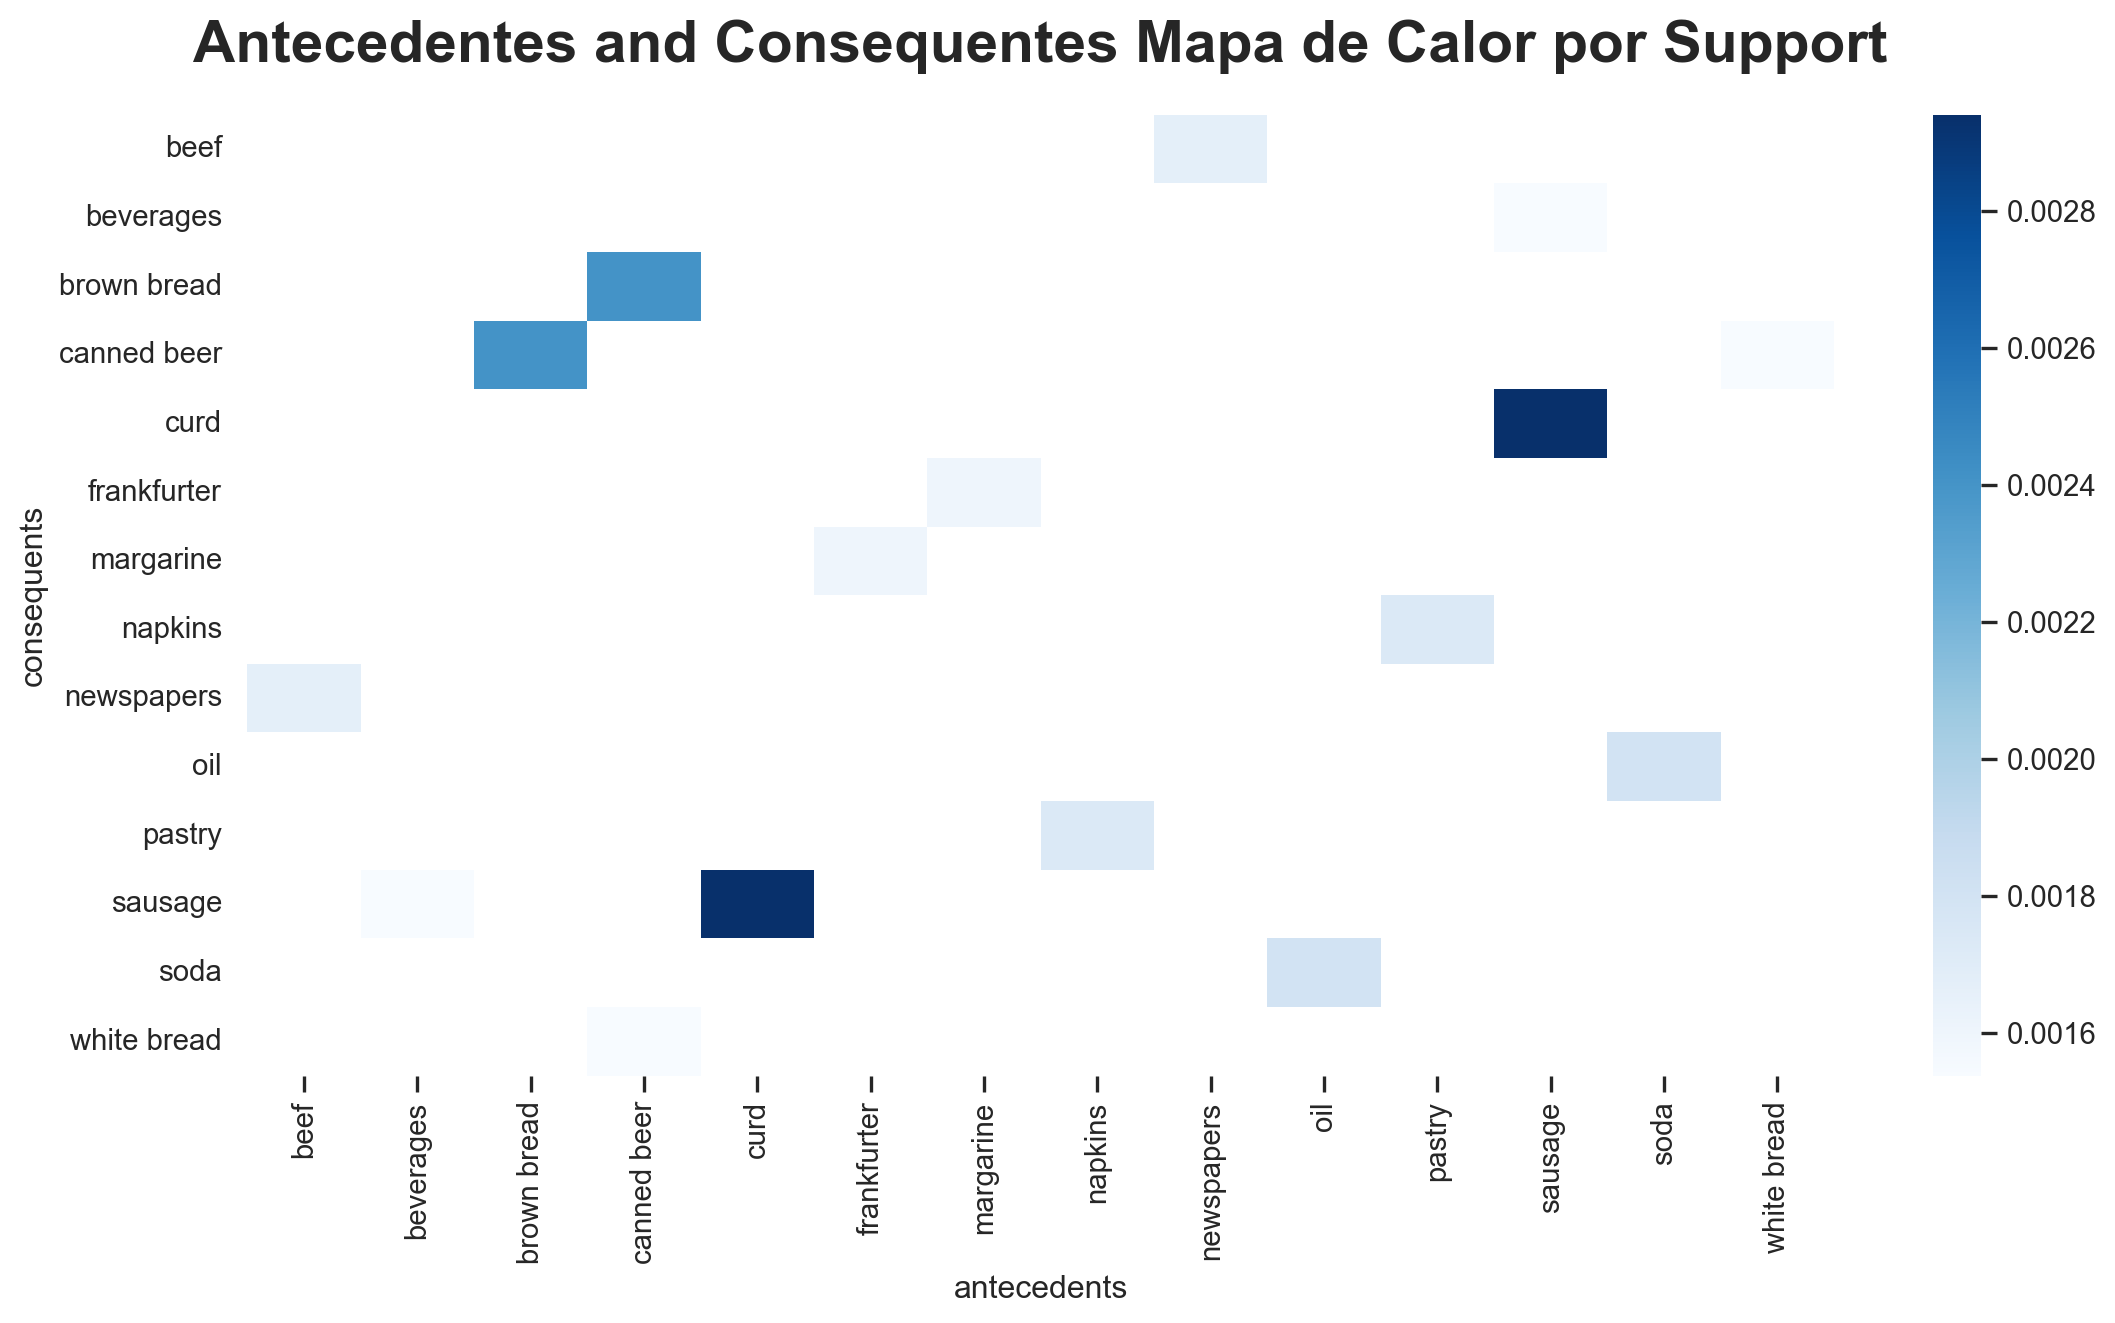

In [25]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot, cmap="Blues")

# Title
plt.title('Antecedentes and Consequentes Mapa de Calor por Support')

# Format and display plot
plt.yticks(rotation=0)
plt.show()

### `Iluminando Associações: Explorando o Lift com Mapas de Calor`
Conforme nossa busca por insights se aprofunda, voltamos nossa atenção para a métrica de lift para iluminar as associações entre nossos produtos. O lift, com sua capacidade única de revelar a força das co-ocorrências, torna-se nossa luz guia nessa jornada. Para visualizar as relações, convocamos novamente o poder dos mapas de calor, mas desta vez com foco no lift.

#### `Erguendo o Véu do Lift`
O lift, o arauto da parceria entre itens, é uma métrica que transcende o comum. Ele nos diz se dois itens co-ocorrem mais ou menos frequentemente do que o esperado apenas pelo acaso. Quando o lift é maior que 1, ele indica uma relação positiva - um sinal de que os itens são frequentemente encontrados juntos, formando uma dupla harmoniosa. Quando o lift é menor que 1, os itens tendem a ser comprados separadamente, seus caminhos se divergindo.

#### `Anotando Insights com Precisão`
Para aprimorar ainda mais nossa compreensão, convocamos anotações para substituir a barra de cores. Essas anotações servirão como marcos, marcando valores maiores que o limiar pivotal de 1.0. Isso nos permite discernir rapidamente a força e a direção das associações, nos orientando na tomada de decisões informadas.

Conforme navegamos por esta paisagem de lift, mapas de calor e anotações, pavimentamos o caminho para uma análise abrangente que transcende o comum. Nossa jornada continua, impulsionada por dados, insights e a busca inabalável pelo conhecimento.

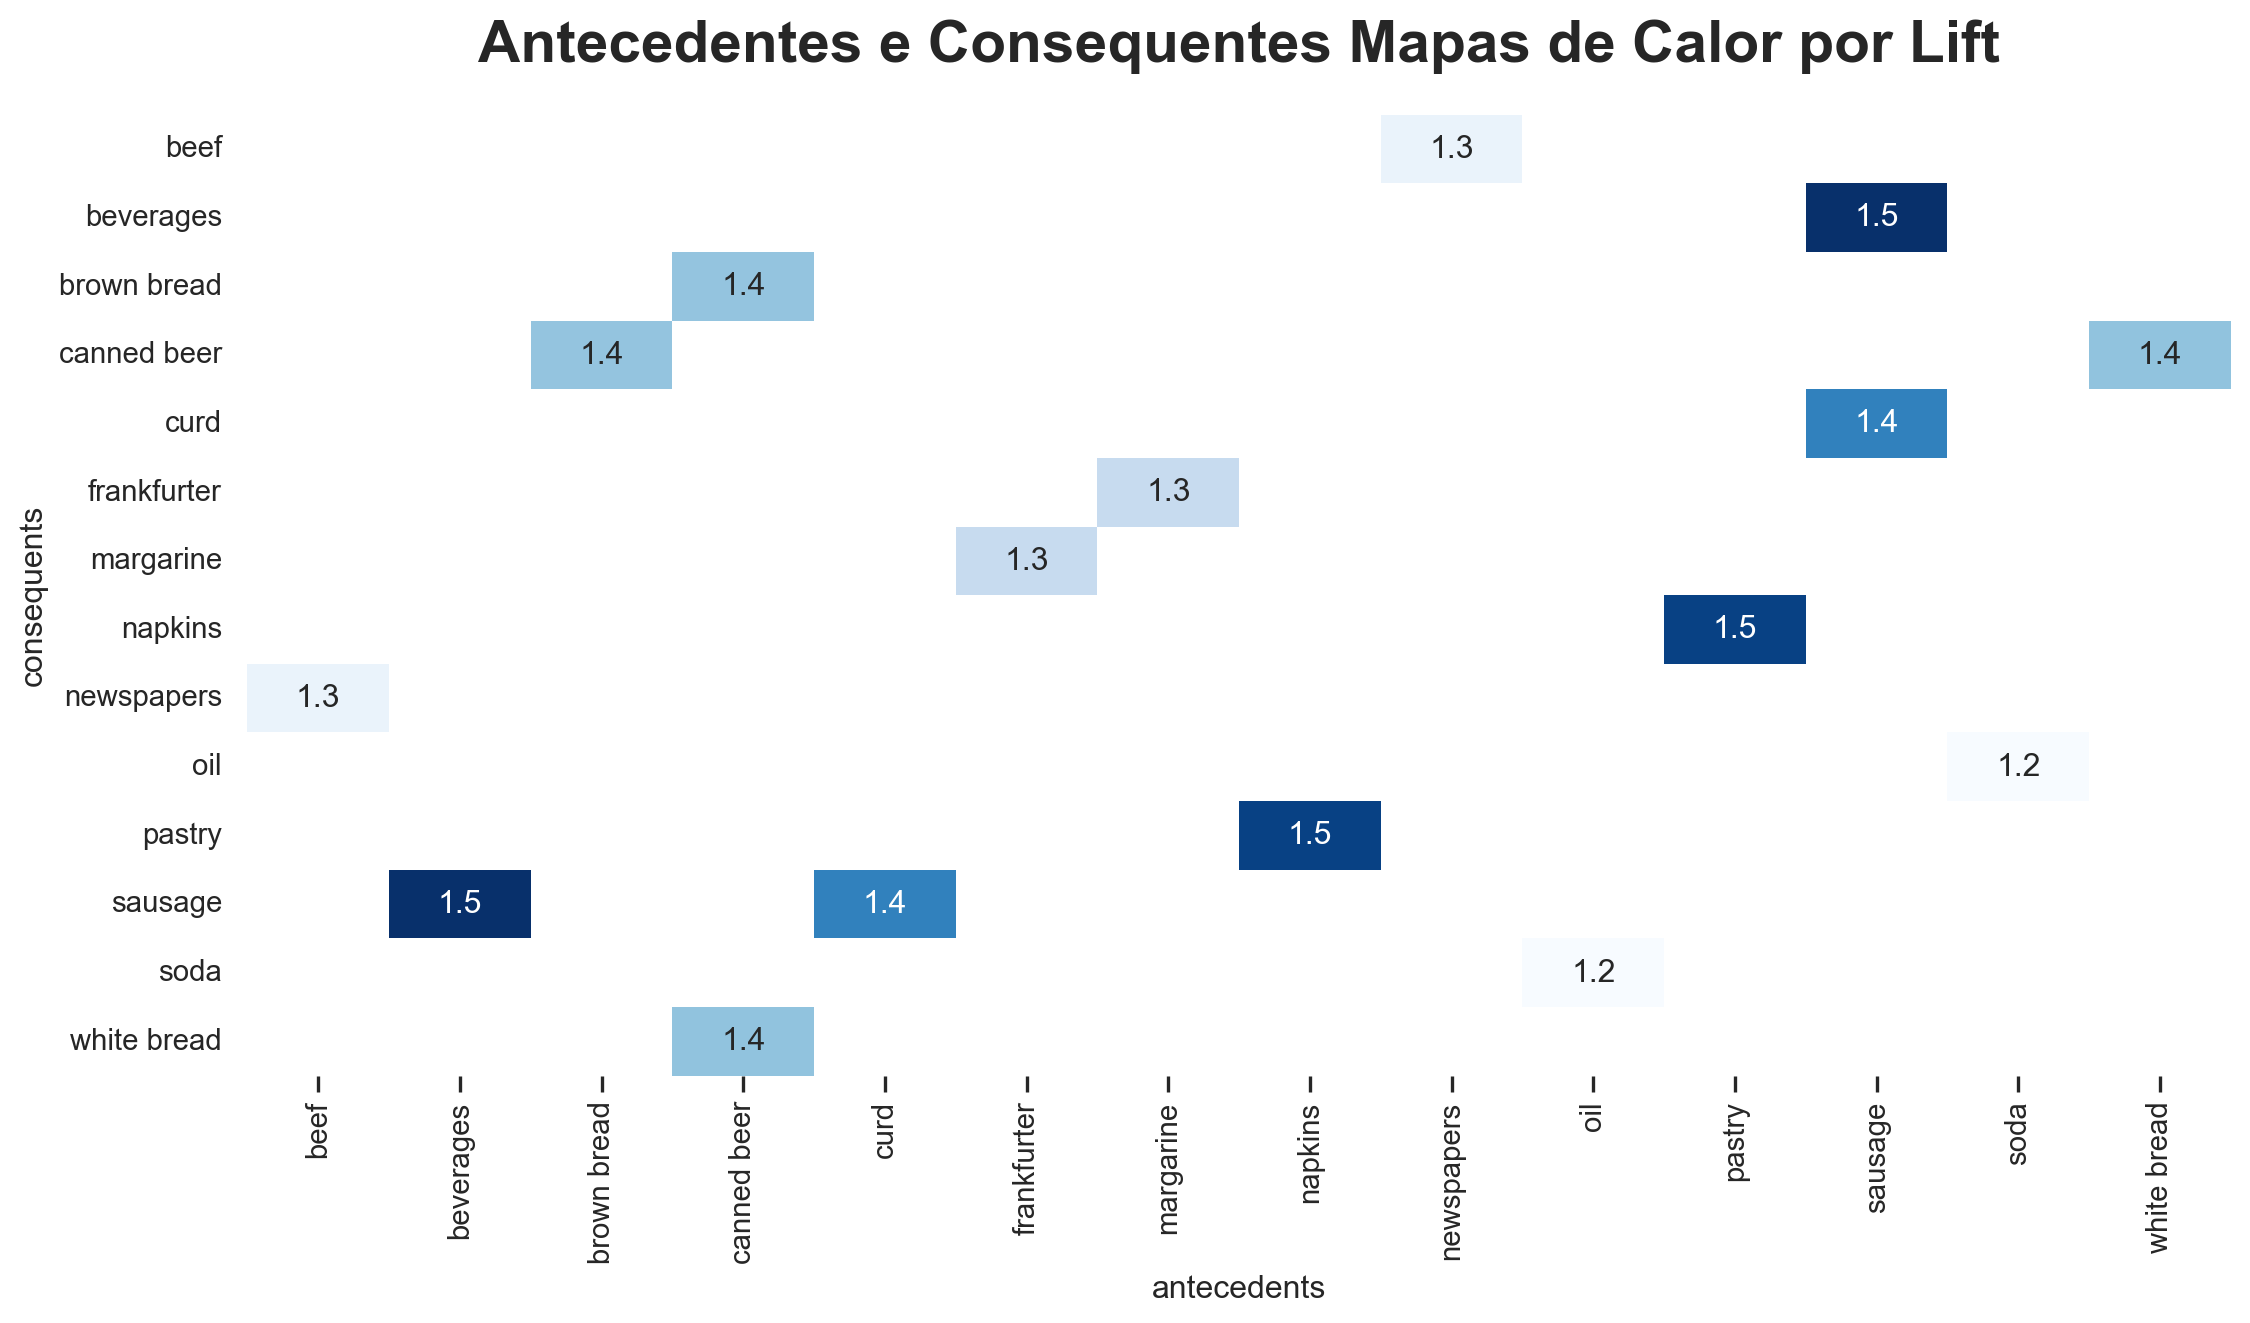

In [26]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar=False, cmap="Blues")

# Title
plt.title('Antecedentes e Consequentes Mapas de Calor por Lift')

# Axis
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### `Visualizando Associações: Revelando Padrões com Gráficos de Dispersão`
Vamos dar uma olhada na elegância visual dos gráficos de dispersão. Na nossa busca por insights, esses gráficos se tornam nossos companheiros, revelando padrões ocultos e iluminando as relações entre os itens.

#### `Espalhando Dicas pelos Eixos`
Um gráfico de dispersão captura elegantemente a essência das regras de associação, retratando cada regra como um ponto em um plano bidimensional. O eixo x representa a support, enquanto o eixo y confiança e o tamanho dos pontos e representado pelo lift. Cada ponto sussurra uma história - um conto de como os itens se entrelaçam, oferecendo oportunidades para venda cruzada e aprimorando a experiência do cliente.

#### `A Dança da Interpretação`
Enquanto contemplamos os pontos espalhados pelo plano, mergulhamos na dança da interpretação. Um ponto situado no quadrante superior direito significa uma forte associação, com alta confiança e lift. Isso anuncia uma parceria harmoniosa, onde os itens frequentemente viajam juntos, refletindo as preferências dos nossos clientes. Por outro lado, pontos no quadrante inferior esquerdo podem sugerir oportunidades de melhoria, onde os itens desejam uma companhia mais próxima.

#### `Guiados pelos Insights`
Com cada ponto, descobrimos insights que orientam nossa tomada de decisão. Ao examinar essa sinfonia de pontos, iluminamos as forças e fraquezas das nossas recomendações. Nossa jornada pelo mundo dos gráficos de dispersão nos capacita com uma narrativa visual, enriquecendo nossa compreensão das relações intrincadas que moldam as ofertas da nossa loja.

Armados com gráficos de dispersão, dados e o espírito de exploração, avançamos, descobrindo associações que nos aproximam do coração dos desejos dos nossos clientes.

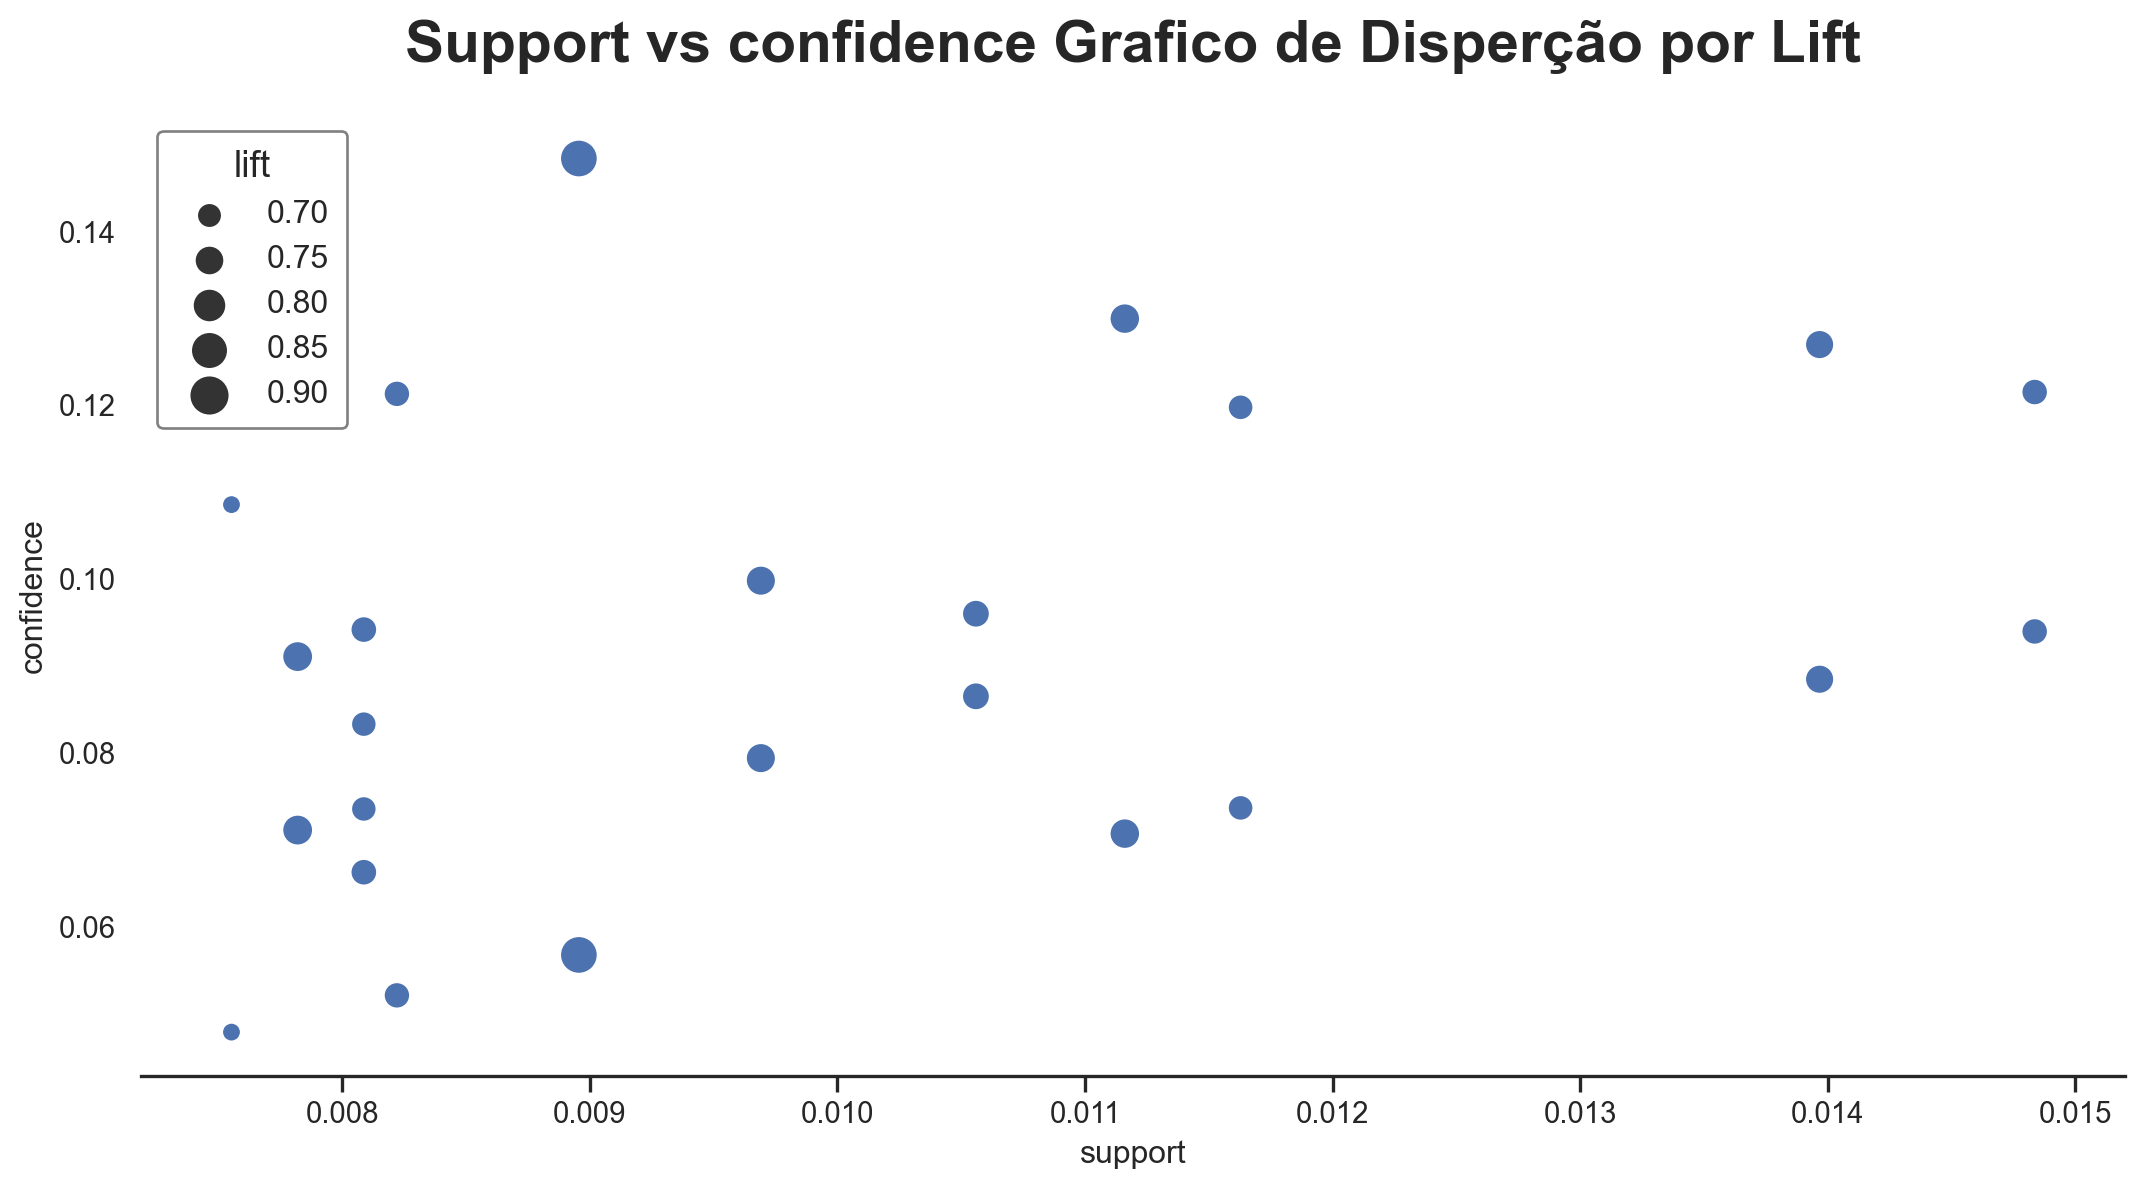

In [27]:
# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift",
                hue_norm=None, 
                data = rules)

# Title
plt.title('Support vs confidence Grafico de Disperção por Lift')

plt.show()

>Absolutamente, a jornada pelas regras de associação e o uso de gráficos de dispersão para visualizar essas relações podem realmente nos fornecer insights valiosos. É fascinante como esses gráficos nos permitem ver as conexões entre itens de maneira mais intuitiva e informativa. Ao explorar a dança dos pontos na tela, podemos identificar tendências, pontos fortes e áreas para melhorias em nossas recomendações de produtos e estratégias de venda cruzada. `O quadrante superior direito se torna um farol de parcerias promissoras, enquanto o quadrante inferior esquerdo nos convida a explorar possibilidades não exploradas.`

>À medida que navegamos pelo reino da descoberta orientada por dados, munidos de gráficos de dispersão como nossa bússola, estamos prontos para tomar decisões informadas que ressoam com os desejos de nossos clientes. Com cada ponto representando uma história única de associação, temos o poder de criar uma experiência de compra que não apenas reflete preferências, mas também enriquece a jornada deles. Essa fusão de arte e ciência, capturada dentro da tela de um gráfico de dispersão, nos permite desvendar a tapeçaria intricada de relações que moldam as ofertas de nossa loja.`

#### `Coordenadas paralelas`:
Combinar `coordenadas paralelas` com o algoritmo Apriori é como compor uma sinfonia onde cada instrumento (recurso) tem um papel crucial no resultado final. O Apriori é comumente utilizado para análise de cesta de compras para identificar conjuntos de itens frequentes e regras de associação. Embora não seja o caso de uso mais direto para `coordenadas paralelas`, podemos definitivamente obter alguns insights únicos ao usá-los juntos.

### `Como o Apriori se encaixa`
O Apriori lida principalmente com dados transacionais, geralmente representados em uma matriz esparsa. Cada linha representa uma transação e as colunas representam itens, frequentemente em um formato binário (1 se o item está na transação, 0 caso contrário).

### `Adaptando Coordenadas Paralelas`
1. **Transformação de Dados**: Como o Apriori opera em dados transacionais categóricos e `coordenadas paralelas` necessitam de dados numéricos, podemos traduzir os valores de support, confiança ou elevação dos conjuntos de itens frequentes para um dataframe.

2. **Seleção de Características**: Como identificamos regras de associação ou conjuntos de itens frequentes cruciais usando o Apriori, esses serão nossas 'características' para o gráfico de coordenadas paralelas. Cada linha representaria um conjunto de itens, e cada eixo seria uma métrica como support, confiança ou elevação.

3. **Rótulos de Classe**: Podemos codificar as linhas em cores com base em algum critério que faça sentido no contexto da nossa análise com o Apriori, como regras que excedem um determinado limite de confiança ou elevação.

### `Considerações`
- **Interpretando o Gráfico**: Neste caso, o gráfico nos ajuda a visualizar como vários conjuntos de itens se saem em diferentes métricas. Por exemplo, podemos ver que conjuntos de itens com maior support também podem geralmente ter maior confiança ou elevação, e tais insights.

In [28]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

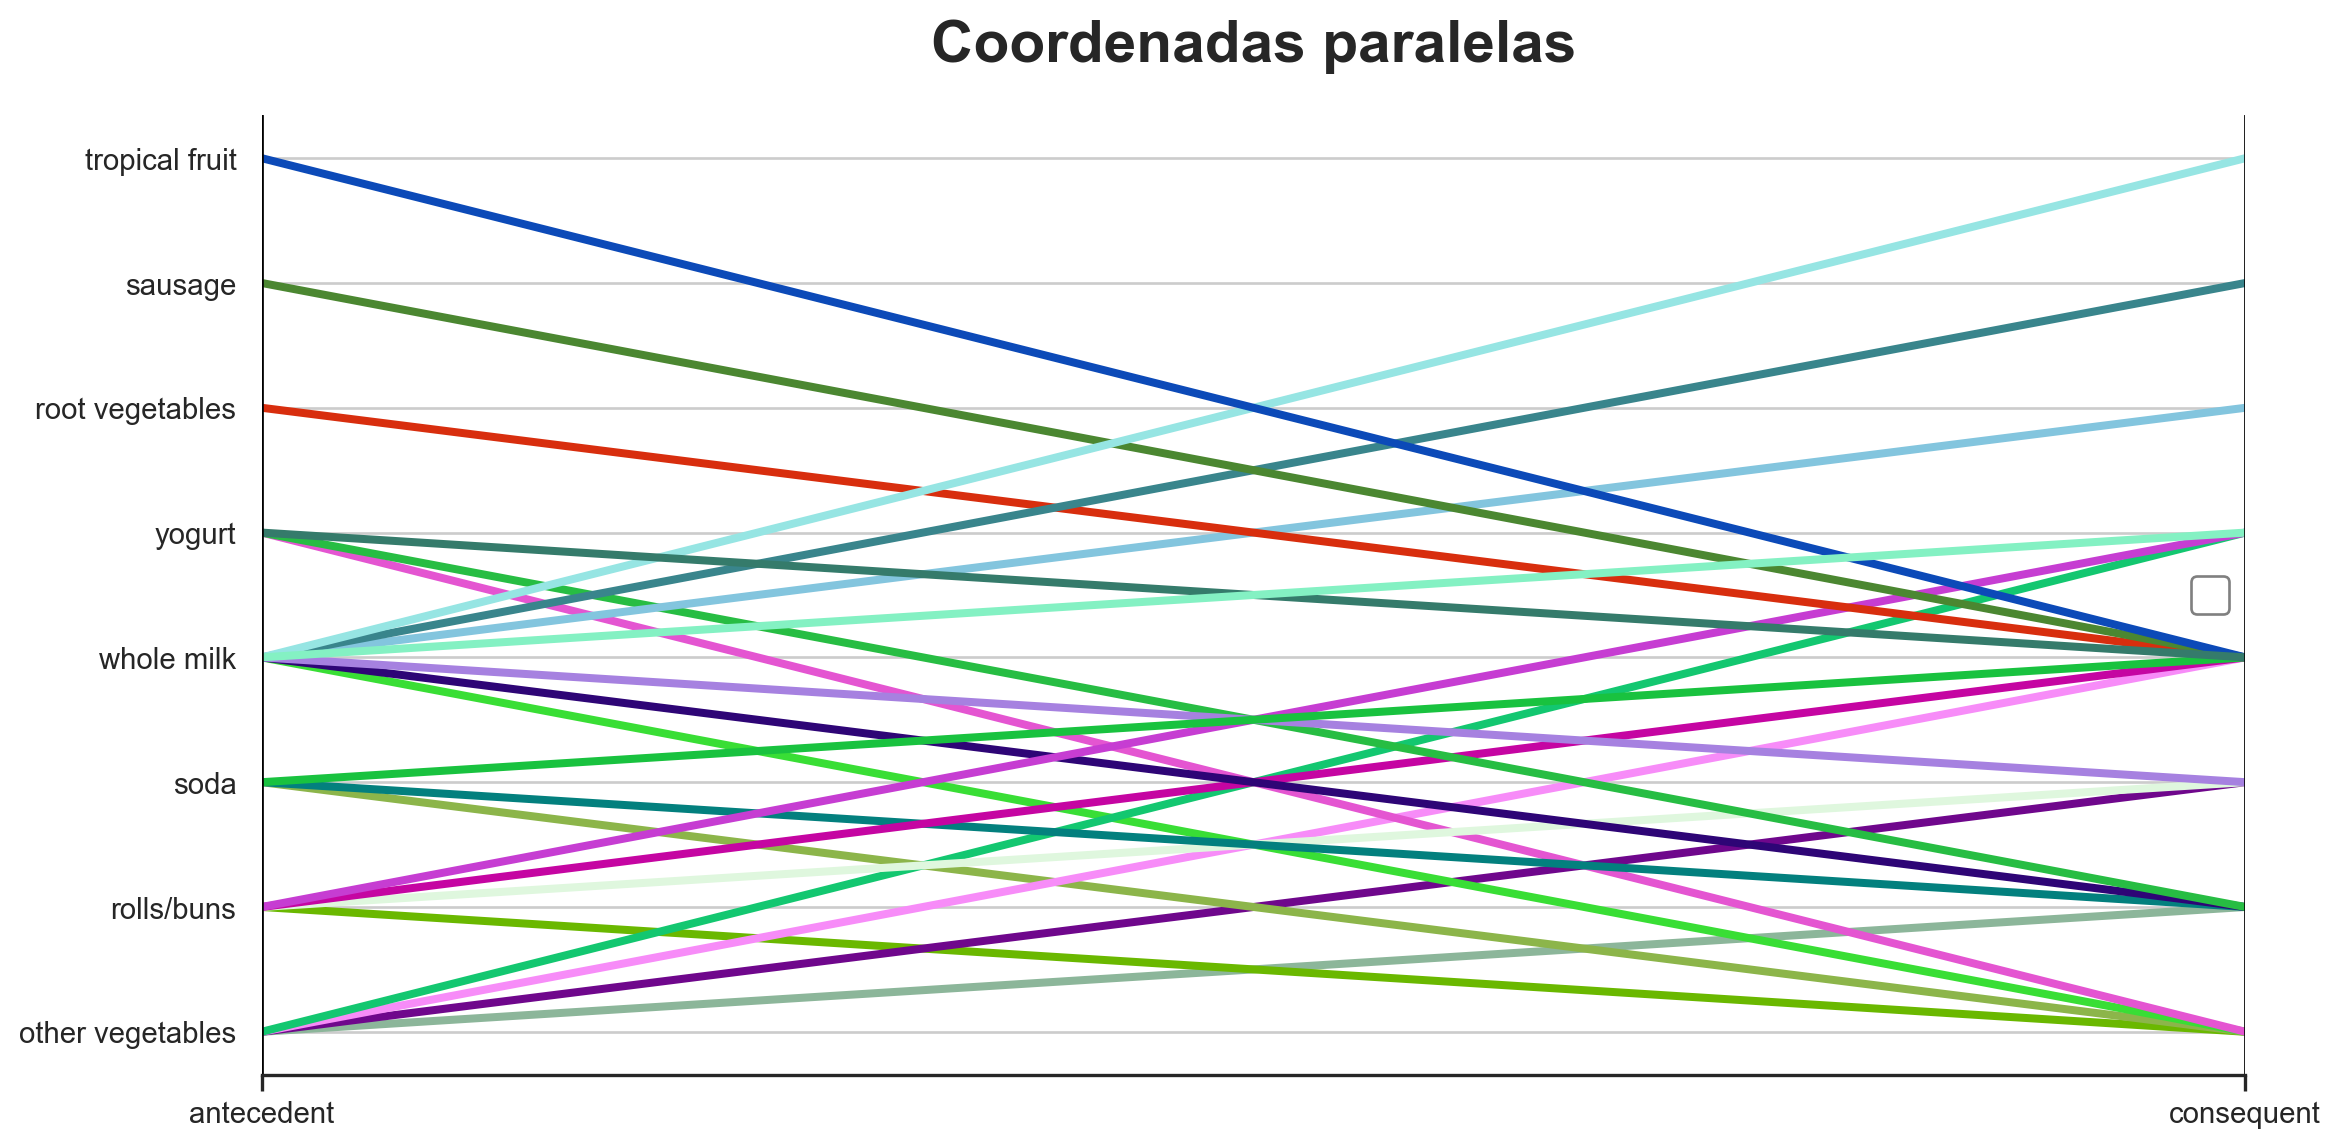

In [29]:
from pandas.plotting import parallel_coordinates

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule')
plt.title('Coordenadas paralelas')
plt.legend([])
plt.show()

### `Conclusão`
**Análise de Cesta de Mercado e Regras de Associação:**
No mundo da ciência de dados, embarcamos em uma jornada para entender como os hábitos de compra das pessoas podem ser desvendados por meio de algo chamado `"análise de cesta de mercado"`. É como descobrir segredos escondidos nas coisas que as pessoas compram. Assim como quando você brinca com blocos de construção, descobrimos quais deles combinam bem.

**Support, Confidence, Lift e Outras Métricas:**
Exploramos como medir a força das conexões entre itens usando métricas como "support", que nos diz com que frequência os itens aparecem juntos, e "confidence", que avalia a probabilidade de comprar uma coisa quando nós temos outra. Pensamos nisso como descobrir quais brinquedos gostamos de brincar mais.

**Poda e Refinamento:**
Às vezes, há muitas regras para considerar. Então, usamos técnicas como "poda" para reduzir a lista para as mais importantes, assim como selecionar nossos doces favoritos de uma caixa grande de guloseimas. Também refinamos nossas escolhas usando diferentes métricas para garantir que tínhamos as melhores.

**Ferramentas de Visualização:**
Exploramos maneiras interessantes de ver todas essas regras. Imaginamos como desenhar imagens coloridas com pontos e linhas. Os mapas de calor nos mostraram quais itens estão intimamente relacionados, e os gráficos de dispersão nos ajudaram a ver quais combinações são fortes ou fracas, como os melhores amigos na escola. E os gráficos de coordenadas paralelas pareciam uma teia de aranha divertida, mostrando como os itens se conectam.

Então, é como quando estamos brincando com brinquedos ou escolhendo lanches. Alguns brinquedos ou lanches são melhores quando temos outros, como manteiga de amendoim e geléia para sanduíches. E às vezes usamos ferramentas especiais para garantir que encontramos as melhores combinações. Assim como encontrar os melhores brinquedos para brincar ou os lanches mais gostosos para saborear, a ciência de dados ajuda as lojas a descobrir o que vender juntamente, para que cliente tenha um momento de compras ou lanches ainda melhores.

Portanto, com esse conhecimento, podemos tornar as compras mais divertidas e empolgantes, oferecendo aos clientes as coisas que eles mais gostam.